In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df_csv = pd.read_csv("./data.csv")
df_csv.drop("device", axis=1, inplace=True)
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         615 non-null    int64  
 1   gpa                615 non-null    float64
 2   semester           615 non-null    float64
 3   degree             615 non-null    float64
 4   age                615 non-null    float64
 5   sex                615 non-null    float64
 6   stress             615 non-null    float64
 7   coping_1           615 non-null    float64
 8   coping_2           615 non-null    float64
 9   coping_3           615 non-null    float64
 10  coping_4           615 non-null    float64
 11  coping_5           615 non-null    float64
 12  coping_6           615 non-null    float64
 13  coping_7           615 non-null    float64
 14  source_1           615 non-null    float64
 15  source_2           615 non-null    float64
 16  source_3           615 non

In [ ]:
Q1 = df_csv['week_1'].quantile(0.25)
Q3 = df_csv['week_1'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



df_csv = df_csv[(df_csv['week_1'] >= lower_bound) & (df_csv['week_1'] <= upper_bound)]
# df_csv

In [ ]:
Q1 = df_csv['week_6'].quantile(0.25)
Q3 = df_csv['week_6'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



df_csv = df_csv[(df_csv['week_6'] >= lower_bound) & (df_csv['week_6'] <= upper_bound)]
df_csv

,Unnamed: 0,gpa,semester,degree,age,sex,stress,coping_1,coping_2,coping_3,...,yesterday_5,yesterday_6,yesterday_typical,enough_1,enough_2,enough_3,enough_4,enough_5,enough_6,survey_time
1,246,2.0,3.0,1.0,20.0,1.0,3.0,4.0,3.0,1.0,...,2.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0
2,251,2.0,6.0,1.0,19.0,2.0,6.0,3.0,2.0,3.0,...,0.0,7.0,4.0,2.0,3.0,3.0,2.0,1.0,1.0,15.0
3,254,2.1,4.0,1.0,23.0,1.0,5.0,3.0,2.0,1.0,...,2.0,6.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,8.0
4,255,2.0,10.0,2.0,24.0,1.0,5.0,2.0,2.0,1.0,...,0.0,4.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,10.0
5,257,2.1,6.0,1.0,22.0,1.0,6.0,3.0,4.0,2.0,...,4.0,6.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1528,1.3,12.0,2.0,25.0,1.0,3.0,3.0,1.0,2.0,...,14.0,10.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,5.0
599,1529,3.0,2.0,1.0,19.0,2.0,6.0,2.0,3.0,1.0,...,7.0,6.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,10.0
600,1532,1.9,4.0,2.0,27.0,1.0,5.0,3.0,2.0,3.0,...,4.0,10.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,20.0
601,1533,2.0,10.0,2.0,23.0,2.0,6.0,3.0,4.0,1.0,...,10.0,9.0,3.0,1.0,1.0,2.0,2.0,3.0,3.0,10.0


In [ ]:
df_csv.to_csv("cleaned.csv")

In [ ]:
bachelor = df_csv[df_csv["degree"] == 1]
master = df_csv[df_csv["degree"] == 2]

gpa = df_csv
bachelor

,Unnamed: 0,gpa,semester,degree,age,sex,stress,coping_1,coping_2,coping_3,...,yesterday_5,yesterday_6,yesterday_typical,enough_1,enough_2,enough_3,enough_4,enough_5,enough_6,survey_time
0,244,2.5,8.0,1.0,23.0,2.0,7.0,2.0,2.0,2.0,...,0.0,10.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,10.0
1,246,2.0,3.0,1.0,20.0,1.0,3.0,4.0,3.0,1.0,...,2.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0
2,251,2.0,6.0,1.0,19.0,2.0,6.0,3.0,2.0,3.0,...,0.0,7.0,4.0,2.0,3.0,3.0,2.0,1.0,1.0,15.0
3,254,2.1,4.0,1.0,23.0,1.0,5.0,3.0,2.0,1.0,...,2.0,6.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,8.0
5,257,2.1,6.0,1.0,22.0,1.0,6.0,3.0,4.0,2.0,...,4.0,6.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1545,1.3,4.0,1.0,20.0,2.0,5.0,3.0,4.0,1.0,...,1.0,7.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,5.0
610,1550,3.0,2.0,1.0,27.0,2.0,5.0,4.0,2.0,3.0,...,7.0,8.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,5.0
611,1554,1.6,2.0,1.0,19.0,1.0,3.0,4.0,1.0,1.0,...,16.0,8.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,15.0
612,1555,3.0,6.0,1.0,31.0,1.0,3.0,3.0,3.0,4.0,...,2.0,8.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0


In [ ]:
junior = df_csv[df_csv['gpa'] >= df_csv['gpa'].quantile(0.67)]
senior = df_csv[df_csv['gpa'] < df_csv['gpa'].quantile(0.33)]

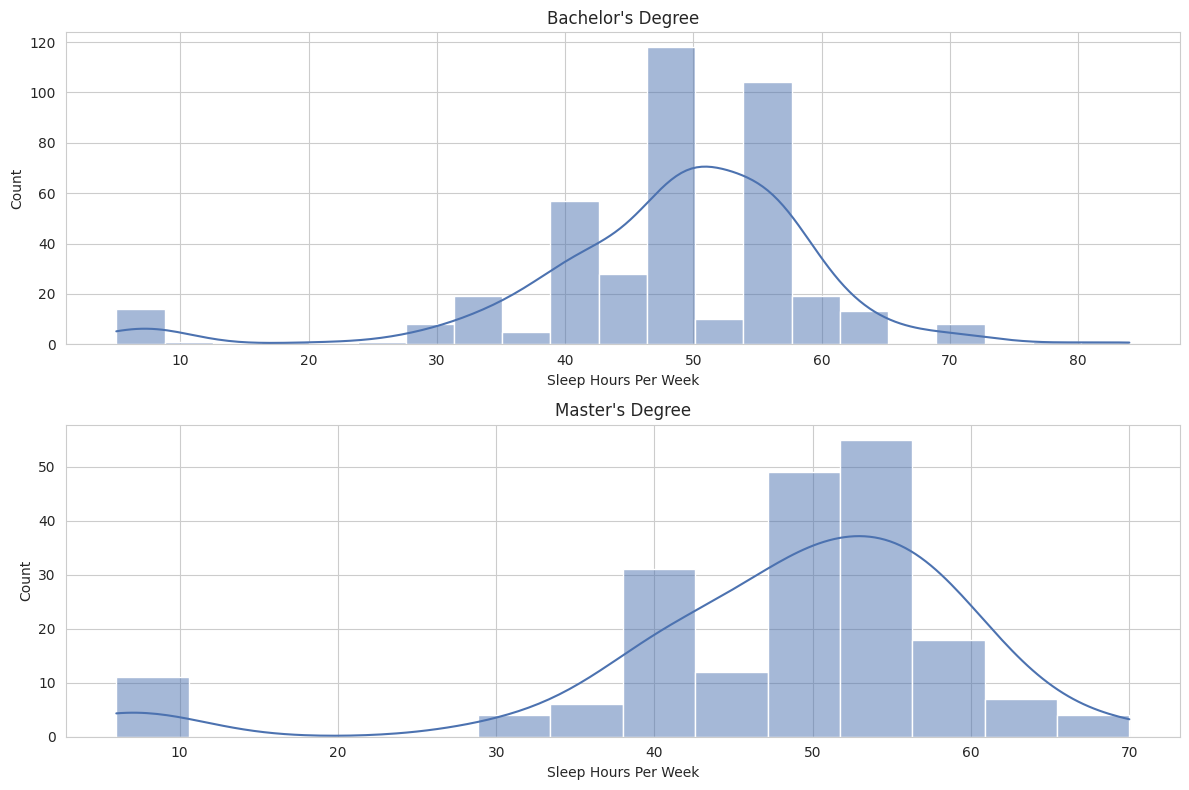

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, figsize=(12, 8), dpi=100)

sns.histplot(x=bachelor["week_6"], ax=axes[0], kde=True)
axes[0].set_xlabel("Sleep Hours Per Week")
axes[0].set_ylabel("Count")
axes[0].set_title("Bachelor's Degree")

sns.histplot(x=master["week_6"], ax=axes[1], kde=True)
axes[1].set_xlabel("Sleep Hours Per Week")
axes[1].set_ylabel("Count")
axes[1].set_title("Master's Degree")
plt.tight_layout()

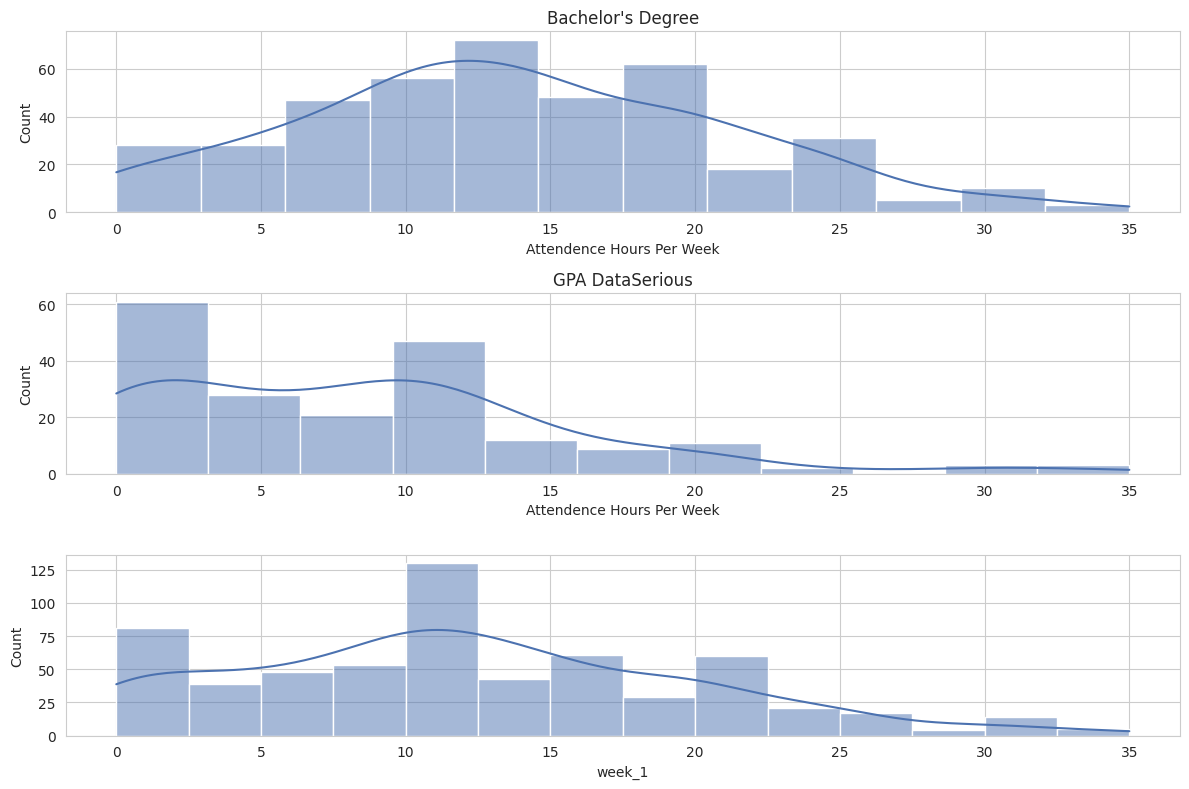

In [ ]:
fig, axes = plt.subplots(3, figsize=(12, 8), dpi=100)

sns.set_style("whitegrid")

sns.histplot(x=bachelor["week_1"], ax=axes[0], kde=True)
axes[0].set_xlabel("Attendence Hours Per Week")
axes[0].set_ylabel("Count")
axes[0].set_title("Bachelor's Degree")

sns.histplot(x=master["week_1"], ax=axes[1], kde=True)
axes[1].set_xlabel("Attendence Hours Per Week")
axes[1].set_ylabel("Count")
axes[1].set_title("Master's Degree")
plt.tight_layout()

sns.histplot(x=gpa["week_1"], ax=axes[2], kde=True)
axes[1].set_xlabel("Attendence Hours Per Week")
axes[1].set_ylabel("Count")
axes[1].set_title("GPA DataSerious")
plt.tight_layout()

In [ ]:
statistic, p_value = stats.mannwhitneyu(junior['week_6'], senior['week_6'])
print(f"Сравнение значимости средних сна по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних сна по критерию Manna_Whitney: pvalue = 0.03944660596323329


In [ ]:
statistic, p_value = stats.mannwhitneyu(bachelor['week_1'], master['week_1'])
print(f"Сравнение значимости средних посещаемости университета для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних посещаемости университета для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 1.1998431991656003e-16


In [ ]:
statistic, p_value = stats.mannwhitneyu(bachelor['week_1'], gpa['week_1'])
print(f"Сравнение значимости средних посещаемости университета для бакалавриата и gpa по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних посещаемости университета для бакалавриата и gpa по критерию Manna_Whitney: pvalue = 0.0002586918913803562


In [ ]:
statistic, p_value = stats.mannwhitneyu(gpa['week_1'], master['week_1'])
print(f"Сравнение значимости средних посещаемости университета для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних посещаемости университета для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 3.400694974745501e-09


In [ ]:
statistic, p_value = stats.mannwhitneyu(bachelor['week_6'], master['week_6'])
print(f"Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 0.5099676498222276


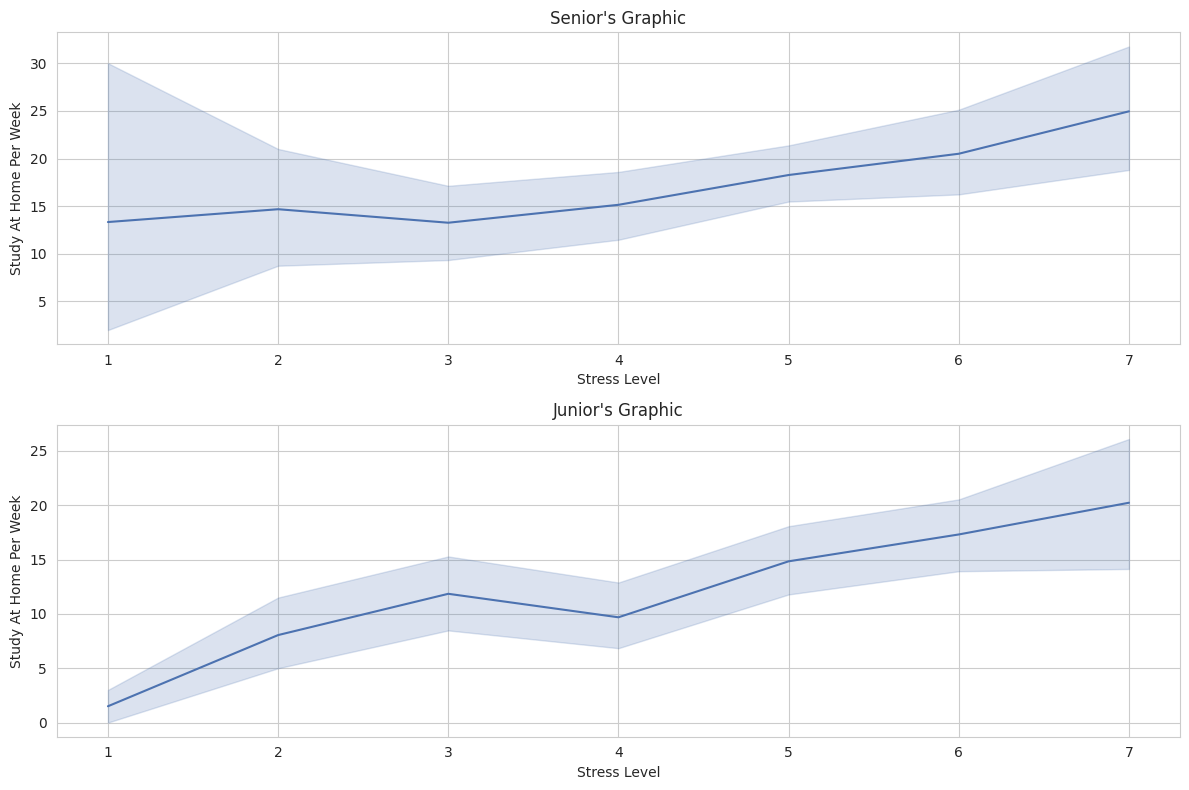

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, figsize=(12, 8), dpi=100)

sns.lineplot(x=senior["stress"], y=senior["week_2"], ax=axes[0])
axes[0].set_xlabel("Stress Level")
axes[0].set_ylabel("Study At Home Per Week")
axes[0].set_title("Senior's Graphic")

sns.lineplot( x=junior["stress"], y=junior["week_2"], ax=axes[1])
axes[1].set_xlabel("Stress Level")
axes[1].set_ylabel("Study At Home Per Week")
axes[1].set_title("Junior's Graphic")
plt.tight_layout()

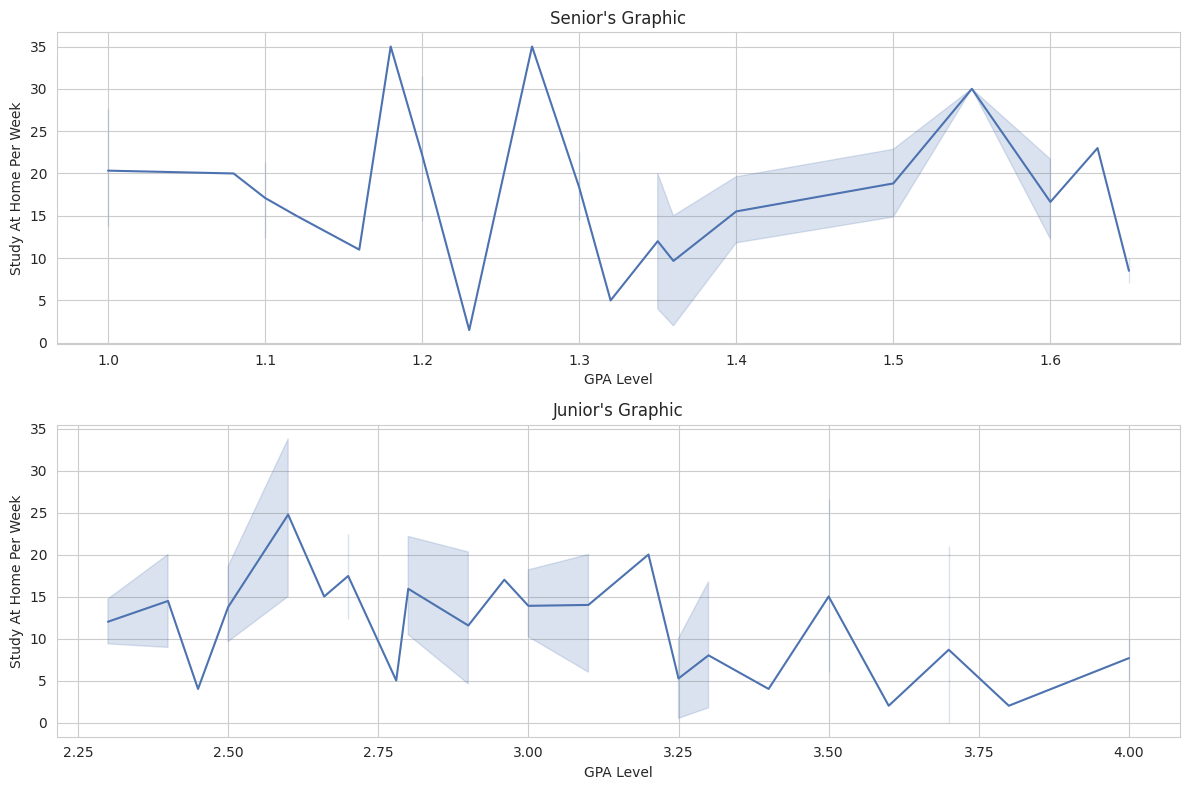

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, figsize=(12, 8), dpi=100)

sns.lineplot(x=senior["gpa"], y=senior["week_2"], ax=axes[0])
axes[0].set_xlabel("GPA Level")
axes[0].set_ylabel("Study At Home Per Week")
axes[0].set_title("Senior's Graphic")

sns.lineplot( x=junior["gpa"], y=junior["week_2"], ax=axes[1])
axes[1].set_xlabel("GPA Level")
axes[1].set_ylabel("Study At Home Per Week")
axes[1].set_title("Junior's Graphic")
plt.tight_layout()

In [ ]:
df_csv.groupby("degree")["week_1"].count()

degree
1.0    387
2.0    184
Name: week_1, dtype: int64

In [93]:
group1m = master[master['gpa'] <= 1.7]
group2m = master[(master['gpa'] > 1.7) & (master['gpa'] <= 2.3)]
group3m = master[master['gpa'] > 2.3]

In [110]:
statistic, p_value = stats.mannwhitneyu(group2m['week_2'], group3m['week_2'])
print(f"Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 0.7244778863836878


In [91]:
group1b = bachelor[bachelor['gpa'] <= 1.7]
group2b = bachelor[(bachelor['gpa'] > 1.7) & (bachelor['gpa'] <= 2.3)]
group3b = bachelor[bachelor['gpa'] > 2.3]

In [105]:
statistic, p_value = stats.mannwhitneyu(group1b['week_2'], group3b['week_2'])
print(f"Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 0.03633051165582519


In [106]:
print(group1b["week_2"].mean(), group2b["week_2"].mean(), group3b["week_2"].mean())

16.95402298850575 15.586206896551724 14.459183673469388


In [104]:
statistic, p_value = stats.mannwhitneyu(group1b['week_5'], group3b['week_5'])
print(f"Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = {p_value}")

Сравнение значимости средних сна для бакалавриата и магистратуры по критерию Manna_Whitney: pvalue = 0.10013830597833645
